In [95]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment2.ipynb")

# Assignment 2: Exploratory Data Analysis in Professional Basketball

In this assignment we'll conduct an exploratory data analysis of professional basketball data.  Basketball is a team sport in which the goal is to try to outscore the amount in a fixed amount of time. Points are scored (either 2 or 3 points) by putting the ball throw a hoop on one end of the court.  An attempt at putting the ball throw the hoop is known as a "shot".  If helpful, you can read more about [the rules of basketball](https://en.wikipedia.org/wiki/Rules_of_basketball).

The National Basketball Association (NBA) is the professional basketball league in the United States and provides a nice website with many statistics gathered on teams and players in the league: [http://stat.nba.com](http://stat.nba.com). 

<!-- BEGIN QUESTION -->

## Question 1: Managing data files

We will use data that is available from NBA. Although NBA doesn't officially make the data API (application programming interface) public, people have figured out ways to access their data programmatically ([1](https://github.com/swar/nba_api), [2](https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation)). However, NBA does not offer an official API and it is possible to get our JupyterHub blocked by the site if we use them. Therefore, in this assignment, the raw data downloads are provided to you in a zip file: https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip

Download and unzip the file to a directory named `data` using command line commands (unzipping on Windows and Mac may not work because different OS have different constraints on filename lengths, etc.). Adding an exclamation point in the Jupyter notebook cell indicates that `bash` shell interpreter will execute your command.
```bash
wget -nc https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip -O nba-data.zip
unzip -o nba-data.zip -d data
```
What these commands are doing:
* `wget` downloads files ([what do each of the pieces do?](https://explainshell.com/explain?cmd=wget+-nc+https%3A%2F%2Fucsb.box.com%2Fshared%2Fstatic%2F940qiuxyp798gv4nx8iwvazu9qqjs37e.zip+-O+nba-data.zip))
* `unzip` will unzip `nba-data.zip` into a directory named `data` (specified by `-d data`) and will overwrite any same filenames when extracting (specified by `-o`).

In [96]:
# Run your commands in this cell
!wget -nc https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip -O nba-data.zip
!unzip -o nba-data.zip -d data

File ‘nba-data.zip’ already there; not retrieving.
Archive:  nba-data.zip
  inflating: data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0  
  inflating: data/commonTeamYears?LeagueID=00&Season=2018-19  
  inflating: data/shotchartdetail?PlayerID=101106&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: data/shotchartdetail?PlayerID=101107&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: data/shotchartdetail?PlayerID=101108&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  infl

<!-- END QUESTION -->

After unzipping the files, you will find three types of files in `data/` directory:

* Team data: `commonTeamYears?LeagueID=00&Season=2018-19`
* Player data: `commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`
* Player's shot data: `shotchartdetail?PlayerID=[PlayerID]&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&`

Each player's shot data is identified by replacing `[PlayerID]` with their numeric ID.

Here is how we will read in the data:
* Each data file contains text in [JSON (Javascript Object Notation) format](https://www.w3schools.com/python/python_json.asp).
* First, read the data content as text (using [Path.read_text()](https://docs.python.org/3/library/pathlib.html#pathlib.Path.read_text) from `pathlib` module)
* Second, we convert it to a Python dictionary format (using [json.loads()](https://docs.python.org/3/library/json.html#json.loads) in `json` module)
* Third, identify DataFrame content 
* Fourth, identify DataFrame header
* Fifth, assemble DataFrame

Another way to unzip a file is using `zipfile`.

In [97]:
import zipfile
with zipfile.ZipFile('nba-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

### Question 1a: Team Data

Read team data file into a pandas data frame named `allteams` starting from the given code below.

In [98]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

# Monkeypatch Pandas' .any and .all methods to always return Python bools
pd.Series.any = lambda self, *args, **kwargs: bool(super(pd.Series, self).any(*args, **kwargs))
pd.Series.all = lambda self, *args, **kwargs: bool(super(pd.Series, self).all(*args, **kwargs))

if not hasattr(np, "_old_round"):
    np._old_round = np.round

    def _np_round(a, *args, **kwargs):
        result = np._old_round(a, *args, **kwargs)
        if np.isscalar(result):
            return float(result)
        return result

    np.round = _np_round

fname  = 'data/commonTeamYears?LeagueID=00&Season=2018-19' # directory_name/file_name
step_1 = Path(fname).read_text()              # str
step_2 = json.loads(step_1)                   # dict
step_3 = step_2['resultSets'][0]['rowSet']    # list 
step_4 = step_2['resultSets'][0]['headers']   # list

In [99]:
# print out each of step_1 through step_4 and understand what each line does
print(step_1)
print(step_2)
print(step_3)
print(step_4)

{"resource":"commonteamyears","parameters":{"LeagueID":"00"},"resultSets":[{"name":"TeamYears","headers":["LEAGUE_ID","TEAM_ID","MIN_YEAR","MAX_YEAR","ABBREVIATION"],"rowSet":[["00",1610612737,"1949","2019","ATL"],["00",1610612738,"1946","2019","BOS"],["00",1610612740,"2002","2019","NOP"],["00",1610612741,"1966","2019","CHI"],["00",1610612742,"1980","2019","DAL"],["00",1610612743,"1976","2019","DEN"],["00",1610612745,"1967","2019","HOU"],["00",1610612746,"1970","2019","LAC"],["00",1610612747,"1948","2019","LAL"],["00",1610612748,"1988","2019","MIA"],["00",1610612749,"1968","2019","MIL"],["00",1610612750,"1989","2019","MIN"],["00",1610612751,"1976","2019","BKN"],["00",1610612752,"1946","2019","NYK"],["00",1610612753,"1989","2019","ORL"],["00",1610612754,"1976","2019","IND"],["00",1610612755,"1949","2019","PHI"],["00",1610612756,"1968","2019","PHX"],["00",1610612757,"1970","2019","POR"],["00",1610612758,"1948","2019","SAC"],["00",1610612759,"1976","2019","SAS"],["00",1610612760,"1967","2

Use variables constructed above to assemble `allteams` DataFrame.

Drop any teams that no longer exist as of 2019. These teams show None in `ABBREVIATION` column.

Hint: We want to get rid of the NA's.

In [100]:
allteams = pd.DataFrame(step_3, columns=step_4)

allteams = allteams.dropna(subset=['ABBREVIATION'])

In [101]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b: Player Data

`pathlib` has flexible ways to specify file and directory paths. For example, the following are equivalent:

* `Path('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`
* `Path('data') / 'commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`
* `Path('data').joinpath('commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`

Read players data file with name `data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`. 
Assemble pandas DataFrame with name `allplayers`. Set row index to be `PERSON_ID` and then `sort_index`.


In [102]:
dirname  = 'data' # directory_name
filename = 'commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0' # file_name
step_1 = (Path(dirname) / filename).read_text()
step_2 = json.loads(step_1)
step_3 = step_2['resultSets'][0]['rowSet']
step_4 = step_2['resultSets'][0]['headers']
allplayers = pd.DataFrame(step_3, columns=step_4)
allplayers = allplayers.set_index('PERSON_ID').sort_index()
allplayers.head()

DISPLAY_LAST_COMMA_FIRST DISPLAY_FIRST_LAST  ROSTERSTATUS FROM_YEAR  \
PERSON_ID                                                                       
2                     Scott, Byron        Byron Scott             0      1983   
3                      Long, Grant         Grant Long             0      1988   
7                     Schayes, Dan        Dan Schayes             0      1981   
9                  Threatt, Sedale     Sedale Threatt             0      1983   
12                     King, Chris         Chris King             0      1993   

          TO_YEAR      PLAYERCODE  TEAM_ID TEAM_CITY TEAM_NAME  \
PERSON_ID                                                        
2            1996     byron_scott        0                       
3            2002      grant_long        0                       
7            1998     dan_schayes        0                       
9            1996  sedale_threatt        0                       
12           1998      chris_king        0                       

          TEAM_ABBREVIATION TEAM_CODE GAMES_PLAYED_FLAG  \
PERSON_ID                                                 
2                                                     Y   
3                                                     Y   
7                                                     Y   
9                                                     Y   
12                                                    Y   

          OTHERLEAGUE_EXPERIENCE_CH  
PERSON_ID                            
2                                00  
3                                00  
7                                00  
9                                00  
12                               00

In [103]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c: Shots Data

`pathlib` can also find all filenames that match a given pattern using [`Path.glob()` method](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob).

For example, teams data and players data start with the pattern `common` followed by a wildcard `*`: `common*`. 

We can use this to retrieve two file names with one call:

In [104]:
two_files = Path('data').glob('common*') # generator: https://www.educative.io/edpresso/generator-vs-iterator-in-python
list(two_files)                          # list

[PosixPath('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0'),
 PosixPath('data/commonTeamYears?LeagueID=00&Season=2018-19')]

All file names for shots data start with `shotchartdetail`. 

Use this as the pattern to 
* First, read all file names into `allshots_files`
* Second, loop over each file in `allshots_files` and assemble a dataframe
* Third, add dataframe as an element in a list named `allshots_list` (each file is an data frame item in the list). 
* Fourth, concatenate all dataframes into one dataframe named `allshots`. Set the row index to be `PLAYER_ID` and then `sort_index`.


In [105]:
allshots_files = list(Path('data').glob('shotchartdetail*'))
allshots_files.sort()
allshots_list  = list()

for f in allshots_files:
    step_1 = f.read_text()
    step_2 = json.loads(step_1)
    step_3 = step_2['resultSets'][0]['rowSet']
    step_4 = step_2['resultSets'][0]['headers']
    df = pd.DataFrame(step_3, columns=step_4)
    allshots_list.append(df)

allshots = pd.concat(allshots_list, ignore_index=True)
allshots = allshots.set_index('PLAYER_ID').sort_index()
allshots.head()

GRID_TYPE     GAME_ID GAME_EVENT_ID   PLAYER_NAME  \
PLAYER_ID                                                              
1713       Shot Chart Detail  0021800007             9  Vince Carter   
1713       Shot Chart Detail  0021800928           551  Vince Carter   
1713       Shot Chart Detail  0021800928           417  Vince Carter   
1713       Shot Chart Detail  0021800928           278  Vince Carter   
1713       Shot Chart Detail  0021800928           107  Vince Carter   

              TEAM_ID      TEAM_NAME PERIOD MINUTES_REMAINING  \
PLAYER_ID                                                       
1713       1610612737  Atlanta Hawks      1                11   
1713       1610612737  Atlanta Hawks      4                 9   
1713       1610612737  Atlanta Hawks      3                 6   
1713       1610612737  Atlanta Hawks      2                 4   
1713       1610612737  Atlanta Hawks      1                 3   

          SECONDS_REMAINING   EVENT_TYPE  ...         SHOT_ZONE_AREA  \
PLAYER_ID                                 ...                          
1713                     44  Missed Shot  ...              Center(C)   
1713                     15    Made Shot  ...              Center(C)   
1713                     51    Made Shot  ...  Right Side Center(RC)   
1713                     16  Missed Shot  ...              Center(C)   
1713                     24    Made Shot  ...          Right Side(R)   

           SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  \
PLAYER_ID                                                                  
1713               24+ ft.            27    74   266                   1   
1713       Less Than 8 ft.             0     2     7                   1   
1713               24+ ft.            24   131   211                   1   
1713       Less Than 8 ft.             6   -58    34                   1   
1713              8-16 ft.             9    90    30                   1   

          SHOT_MADE_FLAG GAME_DATE  HTM  VTM  
PLAYER_ID                                     
1713                   0  20181017  NYK  ATL  
1713                   1  20190301  ATL  CHI  
1713                   1  20190301  ATL  CHI  
1713                   0  20190301  ATL  CHI  
1713                   1  20190301  ATL  CHI  

[5 rows x 23 columns]

In [106]:
grader.check("q1c")

q1c results: All test cases passed!

### Question 1d: Extract Stephen Curry's Shot Data

Use [`allplayers.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to find the player id (index) associated with the player named "[Stephen Curry](https://en.wikipedia.org/wiki/Stephen_Curry)".  Set the value of `PlayerID` as `curry_id` of type `str`. 

Subset all of Stephen Curry's shots in a data frame named `curry_data`. Also, set the dtype of `SHOT_MADE_FLAG` to `'bool'` in one command. Something like:  
```
curry_data = allshots.query(???).astype(????)
```

Hint: Try to look over the column names in `all_players` and find the one contains full names to fill in the `query_str`.

In [107]:
# fill-in all ...
query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
curry_id = str(allplayers.query(query_str).index.values[0])
curry_data = allshots.query('PLAYER_ID == ' + curry_id).astype({'SHOT_MADE_FLAG' : 'bool'})
curry_data.head()

GRID_TYPE     GAME_ID GAME_EVENT_ID    PLAYER_NAME  \
PLAYER_ID                                                               
201939     Shot Chart Detail  0021800862           117  Stephen Curry   
201939     Shot Chart Detail  0021800862           600  Stephen Curry   
201939     Shot Chart Detail  0021800862           576  Stephen Curry   
201939     Shot Chart Detail  0021800862           484  Stephen Curry   
201939     Shot Chart Detail  0021800862           467  Stephen Curry   

              TEAM_ID              TEAM_NAME PERIOD MINUTES_REMAINING  \
PLAYER_ID                                                               
201939     1610612744  Golden State Warriors      1                 3   
201939     1610612744  Golden State Warriors      4                 5   
201939     1610612744  Golden State Warriors      4                 6   
201939     1610612744  Golden State Warriors      3                 2   
201939     1610612744  Golden State Warriors      3                 3   

          SECONDS_REMAINING   EVENT_TYPE  ...         SHOT_ZONE_AREA  \
PLAYER_ID                                 ...                          
201939                   55    Made Shot  ...              Center(C)   
201939                    9  Missed Shot  ...  Right Side Center(RC)   
201939                   55  Missed Shot  ...          Right Side(R)   
201939                   24  Missed Shot  ...           Left Side(L)   
201939                    3  Missed Shot  ...          Right Side(R)   

          SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  \
PLAYER_ID                                                                 
201939          16-24 ft.            17     2   172                   1   
201939            24+ ft.            26   116   239                   1   
201939            24+ ft.            22   225    28                   1   
201939            24+ ft.            23  -235     8                   1   
201939          16-24 ft.            22   193   109                   1   

          SHOT_MADE_FLAG GAME_DATE  HTM  VTM  
PLAYER_ID                                     
201939              True  20190213  POR  GSW  
201939             False  20190213  POR  GSW  
201939             False  20190213  POR  GSW  
201939             False  20190213  POR  GSW  
201939             False  20190213  POR  GSW  

[5 rows x 23 columns]

In [108]:
grader.check("q1d")

q1d results: All test cases passed!

## Question 2: Visualization

### Question 2a: All Shots Scatter Plot
Use `seaborn` to create scatter plot of the location of Stephen Curry's shot attempts from this year (`LOC_X` and `LOC_Y`).  When you call a scatterplot, seaborn returns a figure in an object, we'll call it `ax`.  We can set properties of the figure by calling methods on `ax`.  Use this approach to set the x-axis limits to span (-300, 300), the y-axis limits to span (-100, 500).

In [109]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


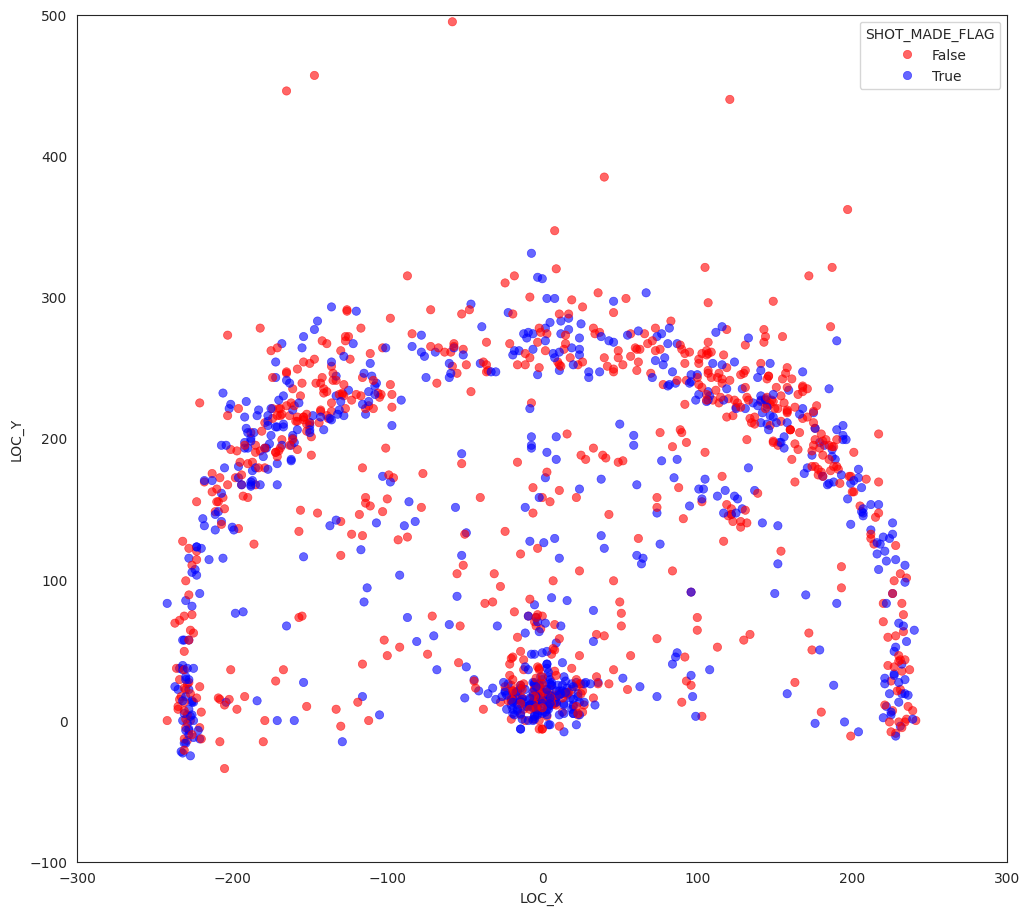

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl  # <-- needed for correct patch target

# --- Monkeypatch matplotlib axes get_xlim / get_ylim to return plain floats ---
if not hasattr(mpl.axes, "_patched_get_limits"):
    def _float_limits(func):
        def wrapper(self, *args, **kwargs):
            lims = func(self, *args, **kwargs)
            return (float(lims[0]), float(lims[1]))
        return wrapper

    mpl.axes._base._AxesBase.get_xlim = _float_limits(mpl.axes._base._AxesBase.get_xlim)
    mpl.axes._base._AxesBase.get_ylim = _float_limits(mpl.axes._base._AxesBase.get_ylim)
    mpl.axes._patched_get_limits = True

# --- Your plot ---
plt.figure(figsize=[12, 11])
ax2a = sns.scatterplot(
    data=curry_data,
    x='LOC_X',
    y='LOC_Y',
    hue='SHOT_MADE_FLAG',
    alpha=0.6,
    palette={True: 'blue', False: 'red'},
    edgecolor=None
)

# Set x/y limits and labels
ax2a.set_xlim(-300, 300)
ax2a.set_ylim(-100, 500)
ax2a.set_xlabel('LOC_X')
ax2a.set_ylabel('LOC_Y')

plt.show()


In [111]:
grader.check("q2a")

q2a results: All test cases passed!

Understanding any dataset is difficult without context.  Lets add some important context by adding the relevant court lines into our diagram.  If you are interested, you can read more about the lines and dimensions on the [NBA basketball court](https://en.wikipedia.org/wiki/Basketball_court).  We will use code from [http://savvastjortjoglou.com/nba-shot-sharts.html](http://savvastjortjoglou.com/nba-shot-sharts.html) to add the court markings to our diagram.  The `draw_court` function below will do this for us.  The below cell will generate an example court.

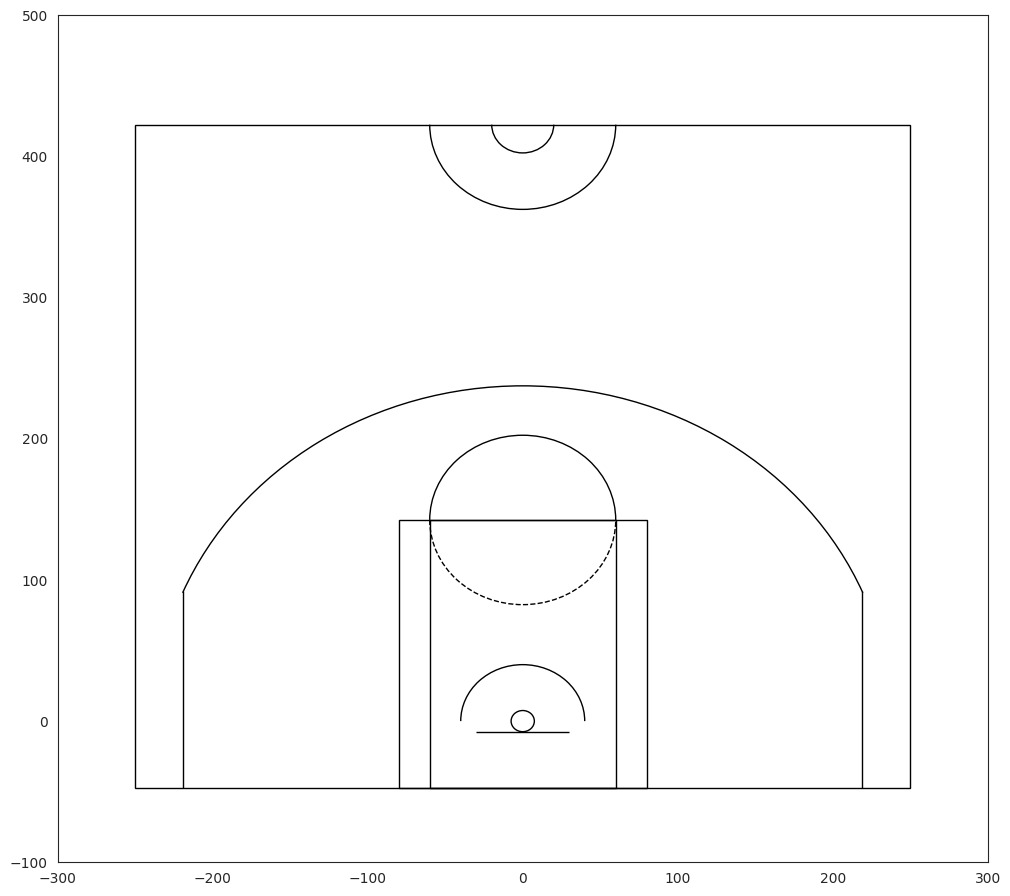

In [112]:
## code is from http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half-court line, baseline and side-out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

<!-- BEGIN QUESTION -->

### Question 2b: All Shots Scatter Plot + Court Outline

Again use seaborn to make a scatter plot of Stephen Curry's shots. Again, set the x-axis limits to span (-300, 300), the y-axis limits to span (-100, 500) color the points by whether the shot was made or missed.  Set the missed shots to have an 'x' symbol and made shots to be a circular symbol. Call the `draw_court` function with `outer_lines` argument set to to be true. Save the `Axes` returned by the plot call in a variable called `ax`.


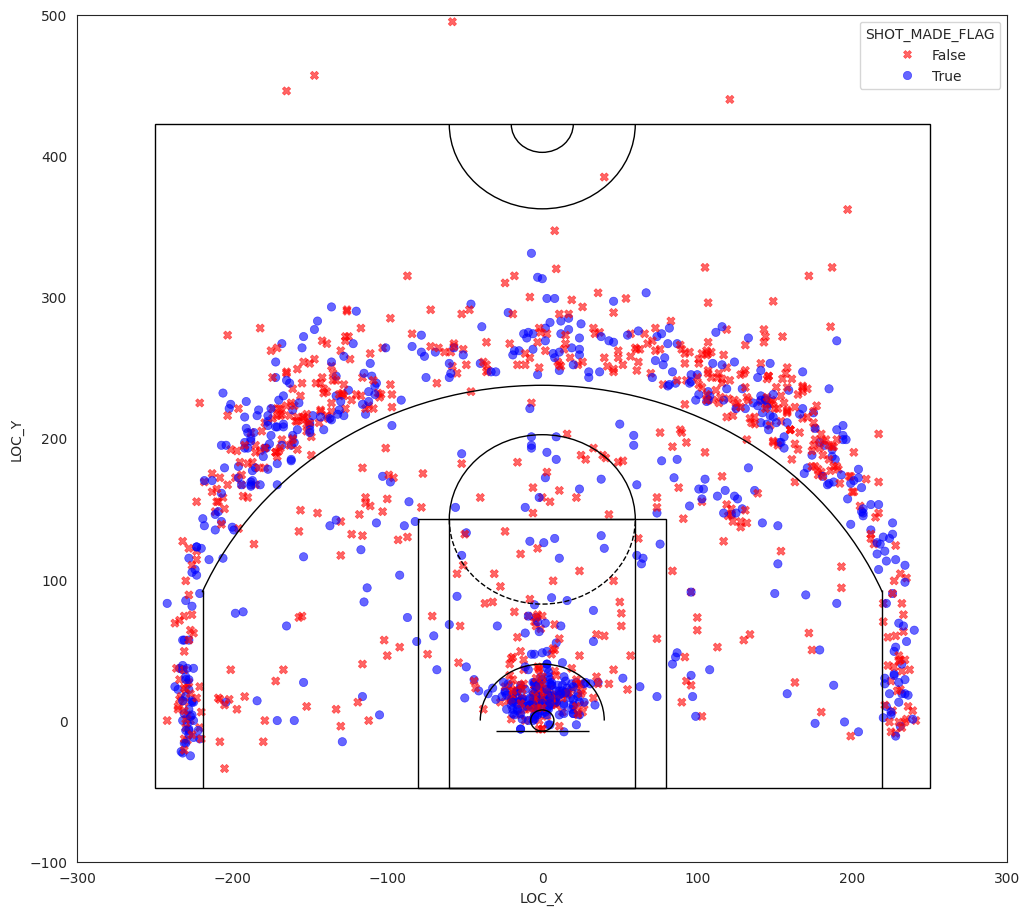

In [113]:
plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(
    data=curry_data,
    x='LOC_X',
    y='LOC_Y',
    hue='SHOT_MADE_FLAG',
    style='SHOT_MADE_FLAG',
    markers=markers,
    alpha=0.6,
    palette={True: 'blue', False: 'red'},
    edgecolor=None
)
draw_court(ax=ax, outer_lines=True)
ax.set_xlim(-300, 300)
ax.set_ylim(-100, 500)
ax.set_xlabel('LOC_X')
ax.set_ylabel('LOC_Y')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2c: Analyzing the Visualization

In a few sentences, discuss what makes this an effective or ineffective visualization for understanding the types of shots that Stephen Curry likes to take and is good at taking, relative to other players in the league.  Are there ways it can be improved?

**SOLUTION**

I think the graph above is an effective way of understanding the types of shots that Curry likes to take and is good at taking vs other players because we can see how the basketball court is laid out and compare a graph of the shots Curry made vs someone else made in two separate graphs and compare this. I think the distinction between colors and shape in this graph denote the same thing so if we said one color for Curry and one for the other player and keep the distinction for shots made or not as cross vs circle it would be more effective. However, this is effective for comparing two maybe three players but if we want to compare a bunch of players we need to come up with a better visual that will be effective. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2d: A Hexbin plot

Visualize Stephen Curry's shots by using a [hexbin plot with marginal histograms](https://seaborn.pydata.org/examples/hexbin_marginals.html). Also refer to setting [figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) for what commands below do.

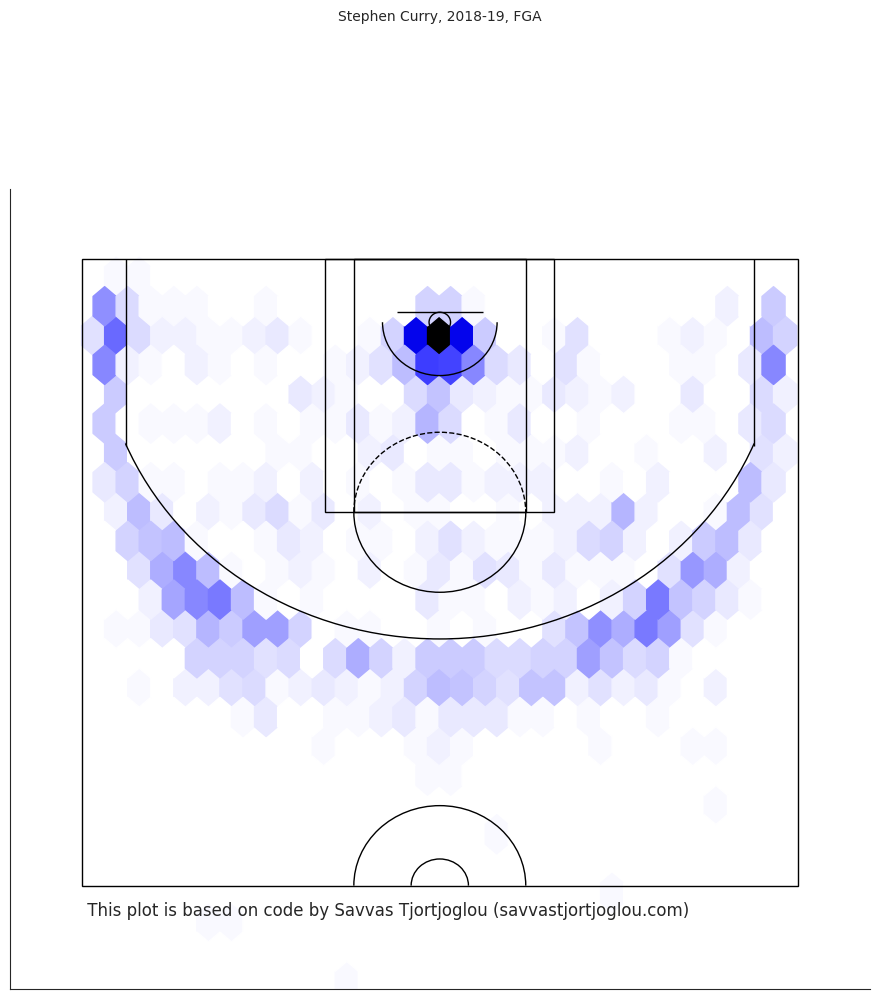

In [114]:
sns.set_style("white")
joint_shot_chart = sns.jointplot(
    data=curry_data,
    x='LOC_X',
    y='LOC_Y',
    kind='hex',
    gridsize=30,         # controls hex size; optional tweak     
    color='blue'         # base color of hexes
)
joint_shot_chart.fig.set_size_inches(12,11)

joint_shot_chart.ax_marg_x.remove()
joint_shot_chart.ax_marg_y.remove()

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, outer_lines=True)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-300, 300)
ax.set_ylim(500, -100)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Stephen Curry, 2018-19, FGA', 
             y=1.2, fontsize=10)

# Add Data Source and Author
ax.text(-250,445,'\n This plot is based on code by Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2e: A Contour Plot

Another way to visualize Stephen Curry's shots is using contours. We can use `distplot()` for 2D data in `seaborn` to visualize the distribution of missed shots and made shots.

Also visualize the distribution of shots in different shot area (`SHOT_ZONE_AREA`) by contour plots and display them in 2 rows.

Hint: See the [document](https://seaborn.pydata.org/tutorial/distributions.html) for `distplot()`.

In [115]:
curry_data.head()

GRID_TYPE     GAME_ID GAME_EVENT_ID    PLAYER_NAME  \
PLAYER_ID                                                               
201939     Shot Chart Detail  0021800862           117  Stephen Curry   
201939     Shot Chart Detail  0021800862           600  Stephen Curry   
201939     Shot Chart Detail  0021800862           576  Stephen Curry   
201939     Shot Chart Detail  0021800862           484  Stephen Curry   
201939     Shot Chart Detail  0021800862           467  Stephen Curry   

              TEAM_ID              TEAM_NAME PERIOD MINUTES_REMAINING  \
PLAYER_ID                                                               
201939     1610612744  Golden State Warriors      1                 3   
201939     1610612744  Golden State Warriors      4                 5   
201939     1610612744  Golden State Warriors      4                 6   
201939     1610612744  Golden State Warriors      3                 2   
201939     1610612744  Golden State Warriors      3                 3   

          SECONDS_REMAINING   EVENT_TYPE  ...         SHOT_ZONE_AREA  \
PLAYER_ID                                 ...                          
201939                   55    Made Shot  ...              Center(C)   
201939                    9  Missed Shot  ...  Right Side Center(RC)   
201939                   55  Missed Shot  ...          Right Side(R)   
201939                   24  Missed Shot  ...           Left Side(L)   
201939                    3  Missed Shot  ...          Right Side(R)   

          SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  \
PLAYER_ID                                                                 
201939          16-24 ft.            17     2   172                   1   
201939            24+ ft.            26   116   239                   1   
201939            24+ ft.            22   225    28                   1   
201939            24+ ft.            23  -235     8                   1   
201939          16-24 ft.            22   193   109                   1   

          SHOT_MADE_FLAG GAME_DATE  HTM  VTM  
PLAYER_ID                                     
201939              True  20190213  POR  GSW  
201939             False  20190213  POR  GSW  
201939             False  20190213  POR  GSW  
201939             False  20190213  POR  GSW  
201939             False  20190213  POR  GSW  

[5 rows x 23 columns]

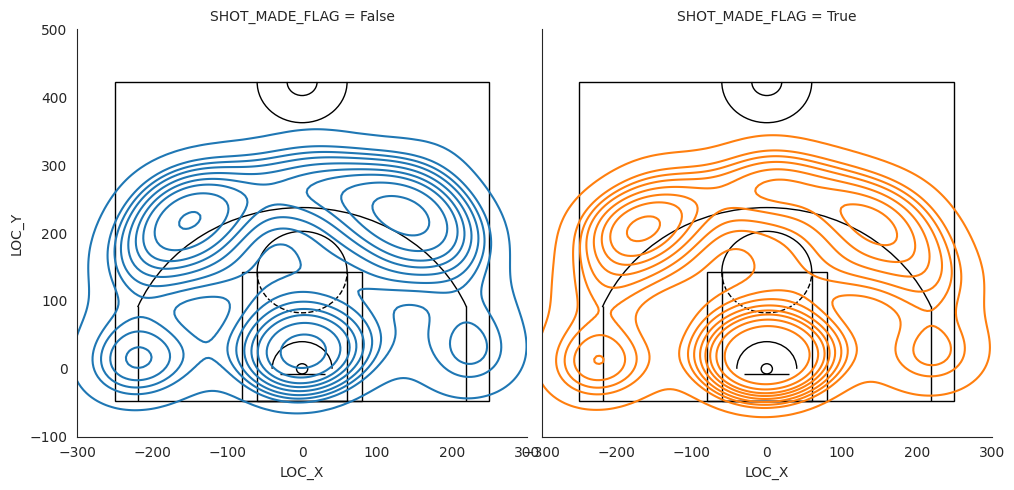

In [116]:
# Visualize Stephen Curry's made and missed shots
# Fill-in ...
contour_miss_made= sns.displot(x='LOC_X', y='LOC_Y', data=curry_data, kind='kde', legend = False, col = 'SHOT_MADE_FLAG', 
                               hue  = 'SHOT_MADE_FLAG', col_wrap = 2) 
for ax in contour_miss_made.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300,300)
    ax.set_ylim(-100,500)

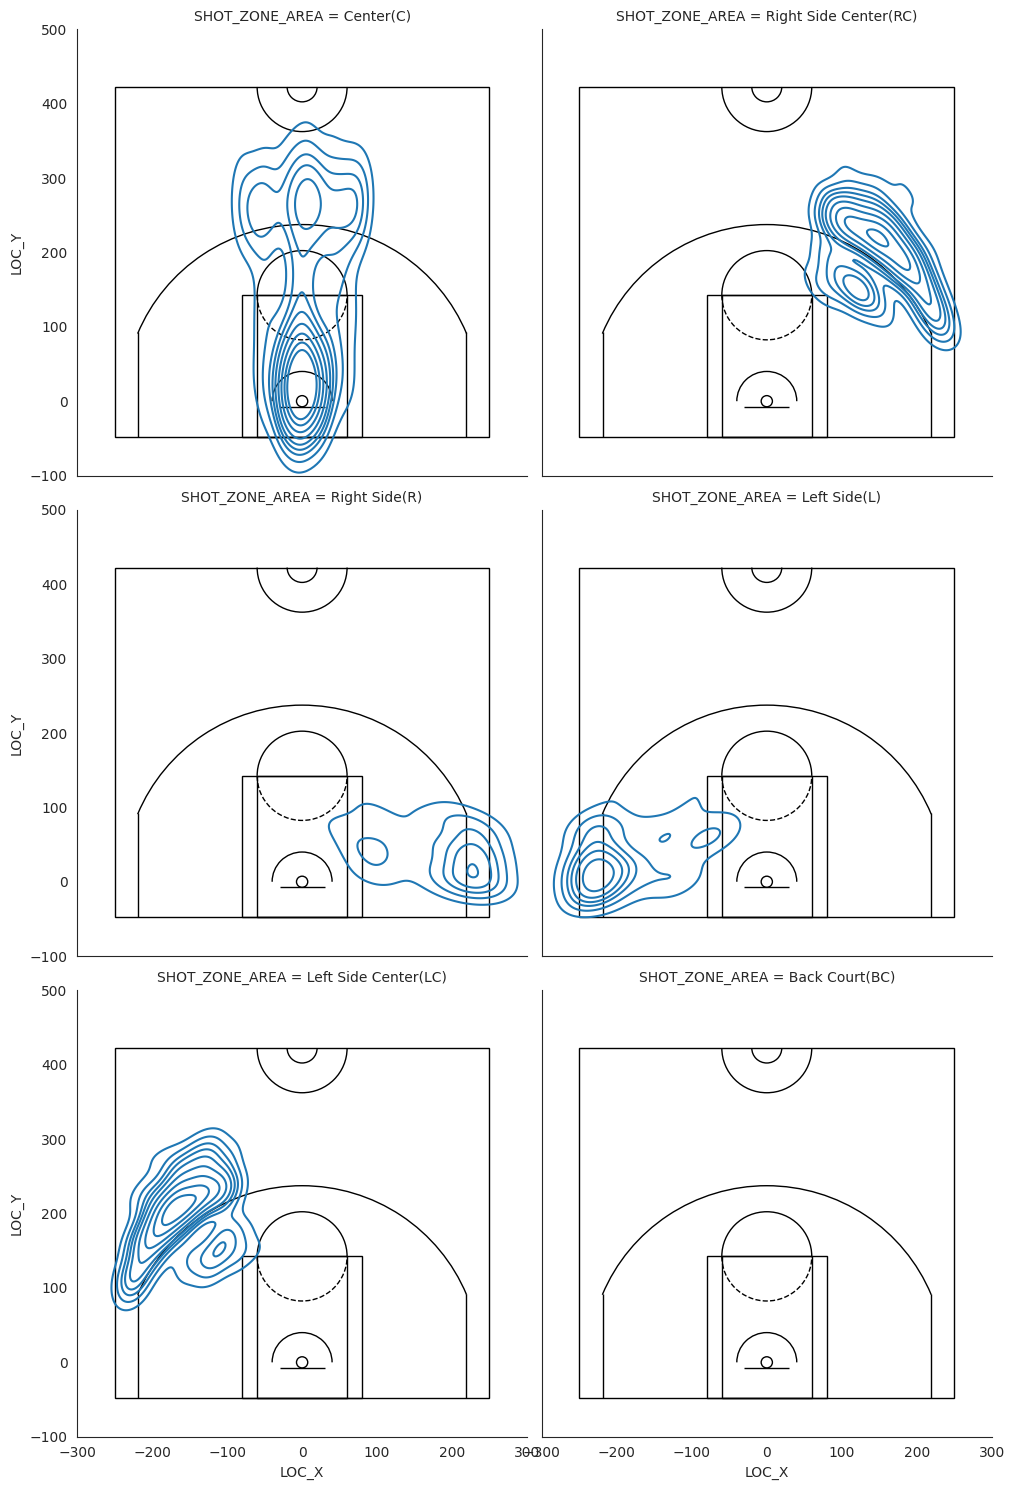

In [117]:
# Visualize Stephen Curry's shots' area
# Fill-in ...
contour_area= sns.displot(x='LOC_X', y='LOC_Y', data=curry_data, kind='kde', legend = False, col = 'SHOT_ZONE_AREA', col_wrap = 2) 
for ax in contour_area.axes.flat:
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300,300)
    ax.set_ylim(-100,500)

In [118]:
curry_data.SHOT_ZONE_AREA.value_counts()

SHOT_ZONE_AREA
Center(C)                506
Right Side Center(RC)    309
Left Side Center(LC)     290
Left Side(L)             127
Right Side(R)             97
Back Court(BC)            11
Name: count, dtype: int64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Comment the advantages and disadvantages of contour plots comparing with hexibin plot(Q2d) and scatter plot(Q2b).

**Solution**

Contour graphs are helpful when we are representing or displaying a threed dimensional surface in 2D setting. Hexbin plots, on the other hand, are nice because the they divide the surface into a grid like structure and shows the accuracy by the density of the color of the grid. They might be easier to interpret since it's just a grid whereas in contour plots the lines connecting and the vertices correspond to a topographic map almost. However, if we are considering the movement or shots of a volatile object we don't want to be restricted to a grid like structure. This is where the contour maps prove to be more helpful. Scatter plots are helpful when comparing and there aren't too many variables to keep track of since each variable is given an attribute to be represented in the graph like color or shape. This can get really messy if there are more variables and the colors just blend. For rudimentary comparisons, scatter plots are the best, for intermediate analysis I think the go to would be the hexbin plots and for advanced visualization contour graphs prove to be the best.

<!-- END QUESTION -->

## Question 3: Binning and Smoothing Shots

So far, in we have worked with dataframes which represent each shot as a single observation (row) within the dataset.  However, this isn't a convenient data structure for the kinds of spatial analyses we will pursue below.

In this part, we will divide the court into square regions and create a matrix which includes the number of shots taken by a player in that region.  We divide the court up into square bins (i.e. a 2d histogram) and, for each player, count number of shots that fall into each bin. Fortunately, this function is relatively simple to write using `numpy` module. 

### Question 3a: 2D Smoothing

Fill in the `bin_shots` function below. Use `np.histgram2d` to count the shots in each bin.  The bins are defined as `bin_edges` which is a pandas Series of the form `(xedges, yedges)`.  If `density = True`, call `ndimage.gaussian_filter` on the result of `np.histogram2d` with smoothing parameter `sigma`.  This will create a smoothed version of the raw data histograms.

In [119]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [120]:
import numpy as np
import pandas as pd
from scipy import ndimage

class HWrap:
    def __init__(self, arr):
        self.arr = arr
    def __array__(self, *a, **kw):
        return np.asarray(self.arr, *a, **kw)
    def __getitem__(self, key):
        return self.arr[key]
    def sum(self, *a, **kw):
        return float(self.arr.sum(*a, **kw))

def bin_shots(df, bin_edges, density=False, sigma=1):

    H, xedges, yedges = np.histogram2d(
        x=df['LOC_X'],
        y=df['LOC_Y'],
        bins=bin_edges
    )

    if density:
        H = ndimage.gaussian_filter(H, sigma=sigma)
        H = H / H.sum()

    return HWrap(H), xedges, yedges


In [121]:
grader.check("q3a")

q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 3b: Visualize the binning on `curry_data`

Call `bin_shots` on `curry_data` to create a binned but unsmoothed matrix of shot counts (call this `curry_binned_unsmoothed`), a binned and smoothed matrix of counts with `sigma=1` (call this `curry_binned_smoothed1`) and one with `sigma=5` (call this `curry_binned_smoothed5`). Use the bin edges defined below:

In [122]:
## bin edge definitions in inches
xedges = np.linspace(start=-300, stop=300, num=151)
yedges = np.linspace(start=-48, stop=372, num=106)

Below we are using the bin edges to create a numpy array to get the graph.

In [123]:
bin_edges = (xedges, yedges)
# fill-in all ...
result1 = bin_shots(curry_data, bin_edges, density=False)
curry_binned_unsmoothed = np.array(result1[0])
xe = result1[1]
ye = result1[2]

result2 = bin_shots(curry_data, bin_edges, density=True, sigma=1)
curry_binned_smoothed1 = np.array(result2[0])

result3 = bin_shots(curry_data, bin_edges, density=True, sigma=5)
curry_binned_smoothed5 = np.array(result3[0])


In [124]:
def plot_shotchart(binned_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## number of x and y bins.  
    nx = xedges.size - 1
    ny = yedges.size - 1

    X, Y = np.meshgrid(xedges, yedges)
    
    if use_log:
        counts = np.log(binned_counts + 1)
        
    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    ax.pcolormesh(X, Y, binned_counts.T, cmap=cmap) 
    ax.set_aspect('equal')
    
    draw_court(ax)
    
    return(ax)

In [125]:
type(curry_binned_unsmoothed)


numpy.ndarray

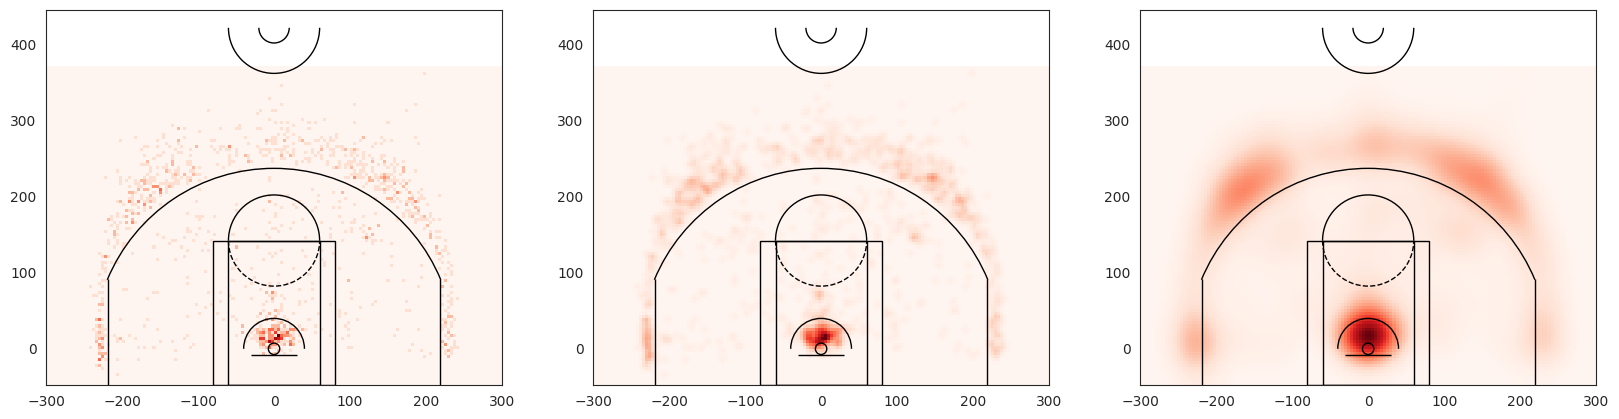

In [126]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
plot_shotchart(curry_binned_unsmoothed, xedges, yedges, ax=ax[0], use_log=False)
plot_shotchart(curry_binned_smoothed1, xedges, yedges, ax=ax[1], use_log=False)
plot_shotchart(curry_binned_smoothed5, xedges, yedges, ax=ax[2], use_log=False)
plt.show()

<!-- END QUESTION -->

### Vectorize Shot Images

- Here we proceed create a dictionary of smoothed patterns, each vectorized into a 1-d array (like Lab 6)
- In this case, the object `all_smooth` is a dictionary that consists of arrays of length `15750`. 
- Each entry in `all_smooth` represents the smoothed frequency of shots along the bins generated in the code above for a given player.

In [127]:
## number of bins is one less than number of edges (remember homework 1)
nx = xedges.size - 1
ny = yedges.size - 1

## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []

## 2d histogram containers for binned counts and smoothed binned counts

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(allshots.groupby('PLAYER_ID')):
    
    ## what does this line do?
    pid, pdf = one
        
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
    
        ## vectorize and store into list
        all_smooth += [np.array(tmp1).reshape(-1)]
        all_counts += [np.array(tmp2).reshape(-1)]
        pids += [pid]
        
X = np.vstack(all_smooth).T
p, n = X.shape

print('Number of shot regions (p):', p)
print('Number of players (n):', n)

Number of shot regions (p): 15750
Number of players (n): 388


## Question 4: Non-negative Matrix Factorization (NMF) 

The non-negative matrix factorization is a dimension reduction technique that is often applied to image data.  It is similar to PCA except that is only applicable for strictly positive data.  We can apply the NMF to vectorized versions of the shot surface. This is useful because we can convert the observed matrix of shot surfaces into:
* Bases: Identifying modes of shooting style (number of modes is determined by `n_components` argument to `NMF` function below)
* Coefficients: How each players shooting style could be expressed as a (positive) linear combination of these bases

The NMF solves the following problem: given some matrix $X$ is $p\times n$ matrix, NMF computes the following factorization:
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$
where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.

In this homework, we have the following:
 
#### The data matrix $X$ 
$X$ is of dimension $n$={number of players} and $p$={number of total square bins on the court}. Each column corresponds to a player, with entries corresponding to a "flattened" or "vectorized" version of the 2d histograms plotted in part 4b.

#### Bases matrix: $W$

Columns $W_i$ contain the shot "bases". First, we will try it with $r=3$ bins in 5a, and then with $r=10$ bins in 5d.

#### Coefficient matrix: H

Each column of $H$ gives a coefficient for each of the bases vectors in $W$, and there are $n$ columns for each player.


The `sklearn` library is one of the main Python machine learning libraries.  It has a built in NMF function for us.  The function below runs this function and normalizes the basis surfaces to sum to 1.

In [128]:
!pip install sklearn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN

In [129]:
## Non-negative Matrix Factorization
def non_negative_marix_decomp(n_components, array_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(array_data)
    
    # Normalize basis vectors to sum to 1
    Wsum = W.sum(axis=0)
    W = W/Wsum
    
    ## fix H correspondingly
    H = model.components_
    H = (H.T * Wsum).T

    nmf = (W, H)
    return(nmf)

### Question 4a: Computing NMF Factorization

Compute the NMF on all player's shot charts, X, assuming with `n_components` = 3 (i.e. each shot chart can be represented as a positive linear combination of 3 "basis" shot charts).  

In [130]:
# fill in ...
W3, H3 = non_negative_marix_decomp(3, X)

In [131]:
grader.check("q4a")

q4a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4b: Visualizing Shot Types

Plot the first three basis images by calling `plot_vectorized_shot_chart` below on the columns of `W3`.

Fill in `plot_vectorized_shot_chart`.  This takes a the a vector of binned shot counts, converts it back to a matrix of the appropriate size and then calls `plot_shotchart` on the matrix.  The numpy function `reshape` will be useful here: [https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

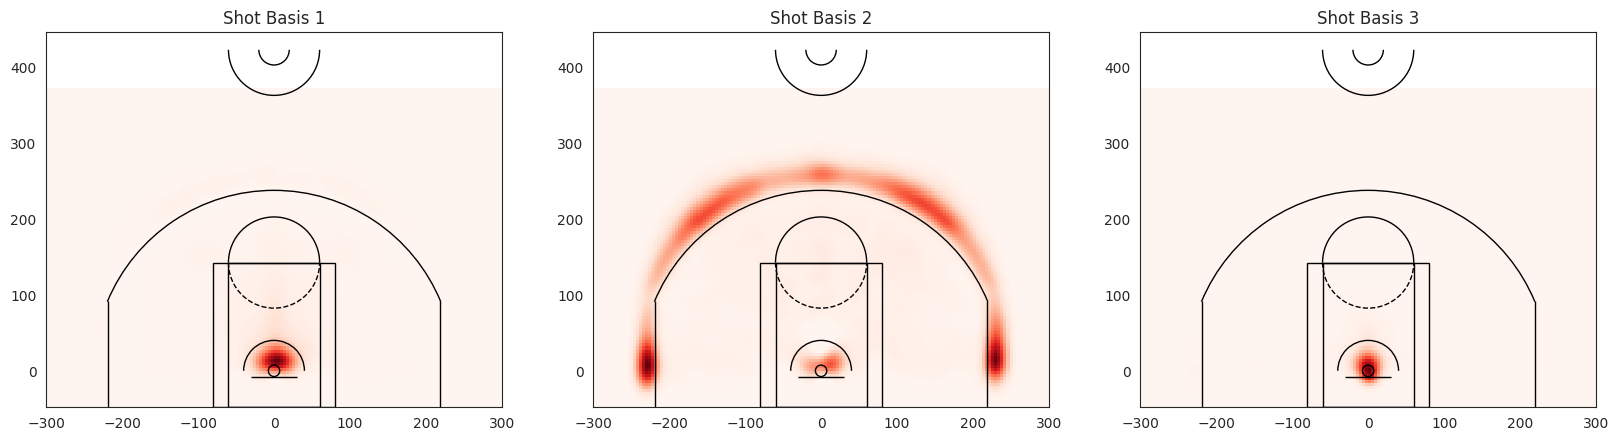

In [132]:
def plot_vectorized_shotchart(vec_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """

    nx = xedges.size - 1
    ny = yedges.size - 1
    
    # use reshape to convert a vectorized counts back into a 2d histogram
    two_d_counts = vec_counts.reshape(nx, ny)
    
    return(plot_shotchart(two_d_counts, xedges, yedges, ax=ax, use_log=use_log, cmap=cmap))

fig, ax = plt.subplots(1, 3, figsize=(20,6))

## Write a for loop
for i in range(3):
    # Call plot_vectorized_shot_chart
    plot_vectorized_shotchart(W3[:, i], xedges, yedges, ax=ax[i], use_log=False)
    ax[i].set_title('Shot Basis %i' % (i+1))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4c: Reconstruction Error

Below we re-construct the shooting pattern for a single player. By "reconstructing" we mean use the approximation $$\hat{X} = WH$$ obtained via NMF.  Find $\hat X$ by multipling W and H.  In python the `@` symbol is used for matrix multiplication.


Below is the code for finding $\hat{X}$ by using the @ operator to matrix multiply in python.

In [133]:
X3_hat = W3 @ H3

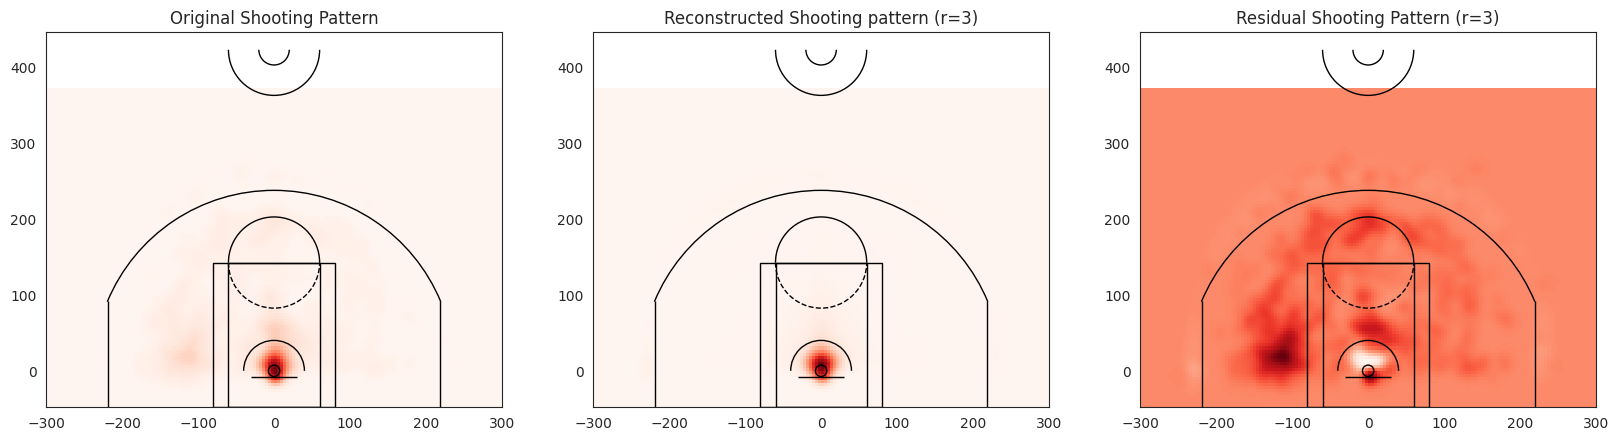

In [134]:
# Find the player_id of LaMarcus Aldridge
player_id = allplayers.query('DISPLAY_FIRST_LAST == "LaMarcus Aldridge"').index.values[0]
player_id = int(player_id)

## find index in X corresponding to that player
to_plot_idx = pids.index(player_id)

fig, ax = plt.subplots(1, 3, figsize=(20,60))

## Call plot_vectorized_shot_chart
original_shotchart = plot_vectorized_shotchart(X[:, to_plot_idx], xedges, yedges, ax=ax[0], use_log=False)
reconstructed_shotchart = plot_vectorized_shotchart(X3_hat[:, to_plot_idx], xedges, yedges, ax=ax[1], use_log=False)
residual_chart = plot_vectorized_shotchart(X[:, to_plot_idx] - X3_hat[:, to_plot_idx], xedges, yedges, ax=ax[2], use_log=False)

# print(max(abs(X3_hat[:, to_plot_idx] - X[:, to_plot_idx])))
ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=3)')
ax[2].set_title('Residual Shooting Pattern (r=3)')
None # prevents the title string from showing up as output

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4d: Choice of Colormap

Why does it make sense to use a _sequential_ palette for the original and reconstructed shot charts and a _diverging_ palette for the residual?  _Hint:_ Read the introduction to colormaps [here](https://matplotlib.org/users/colormaps.html). 


**SOLUTION**

Colormaps are often split into several categories based on their function. The Sequential palette makes sense for original and reconstructed shot charts because the change in lightness and saturation of color incrementally representes the ordering. Whereas, for the residual it is better to use a diverging palette because here the change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color can be used to represent a critial middle value, such as topography or when the data deviates around zero. For diverging maps, we want to have monotonically increase values upto the maximum followed by the decreasing values. We are looking for approximately equal minimum values at opposite ends of the colormap. 

What areas of the court does this player to shoot more and where less relative to the reconstructed area.  If its helpful, you can refer to court locations by name using this legend [here](https://en.wikipedia.org/wiki/Basketball_court#/media/File:Basketball_terms.png]).

**SOLUTION**

The question is asking what are the high and lows of the residual plot. Essentially we can see the the right block (facing the basket), a little between the top of the key and under the basket. There is a bright spot under the basket which means that is the are where the original and reconstructed maps have high concentration of shots. The red and other areas are where either one of them had a higher concentration.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4e: Detailed Modeling

Re-run the analysis, this time for 10 basis vectors instead of 3.  Again plot the bases using `plot_vectorized_shotchart` on the columns of `W10`.

**Hint**: Study the following code
```
fig, ax = plt.subplots(2, 5, figsize=(20, 7))
ax = ax.flatten() # turn ax into a flat array
ax[0].set_title('hello')
ax[9].set_title('there')
fig.show()
```

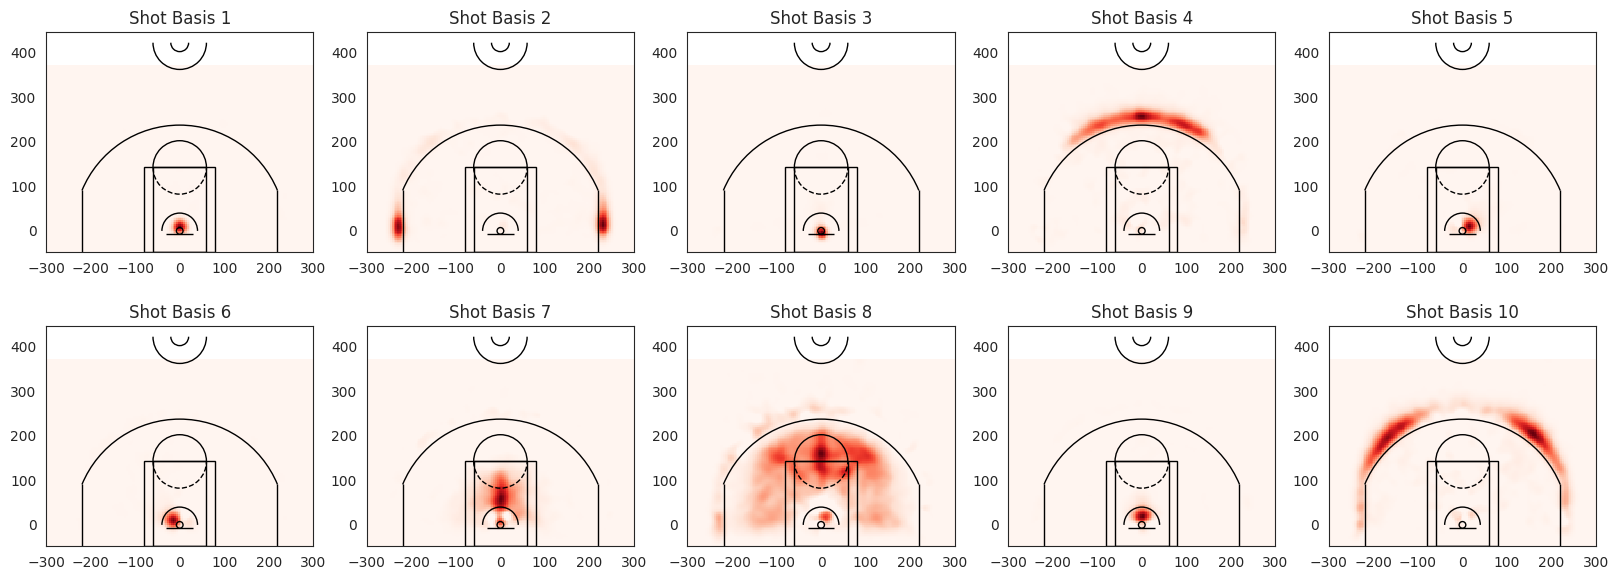

In [135]:
W10, H10 = non_negative_marix_decomp(10, X)

fig, ax = plt.subplots(2, 5, figsize=(20, 7))
ax = ax.flatten()

## Write a for loop
for i in range(10):
    # Call plot_vectorized_shot_chart
    plot_vectorized_shotchart(W10[:, i], xedges, yedges, ax=ax[i], use_log=False)
    ax[i].set_title('Shot Basis %i' % (i+1))


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

If you did things correctly, you should be really impressed! We've identified potentially interesting patterns of shooting styles without actually specifying anything about the way basketball is played or where the relevant lines are on the court.  The resulting images are based only on the actual behavior of the players.  Even more impressive is that we're capturing similarity in regions that are far apart on the court.  One reason we can do this is that a basketball court is symmetric along the length of the court (i.e. symmetric about x=0).  However, people tend to be left or right hand dominant, which might affect their preferences.  Look carefuly at the shot basis plots above: is there any evidence of _asymmetry_ in player shooting behavior?  Refer to specific basis images in your answer.    


**SOLUTION**

In basis 5 and 6 we can see that there are one direction baised. Other images show good symmetry in player shooting behavior. There might be a little left (facing the basket) bias is shot basis 8 but it's negligilbe in my opition. 

<!-- END QUESTION -->

Repeat part 4(c), and again plot original, reconstructed and residual shot chats for LaMarcus Aldridge.


<!-- BEGIN QUESTION -->



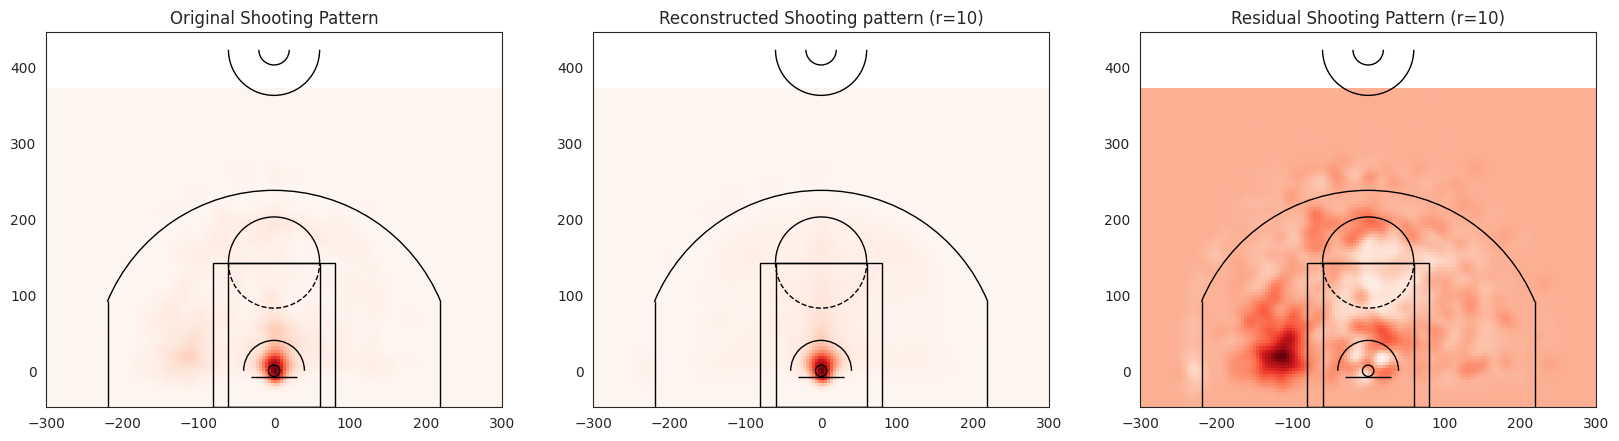

In [136]:
X10_hat = W10 @ H10

fig, ax = plt.subplots(1, 3, figsize=(20,60))

# I took the first player appearing in first column 
# (you probably want to do more interesting players)
original_shotchart = plot_vectorized_shotchart(X[:, to_plot_idx], xedges, yedges, ax=ax[0], use_log=False)
reconstructed_shotchart = plot_vectorized_shotchart(X10_hat[:, to_plot_idx], xedges, yedges, ax=ax[1], use_log=False)
residual_chart = plot_vectorized_shotchart(X[:, to_plot_idx] - X10_hat[:, to_plot_idx], xedges, yedges, ax=ax[2], use_log=False)

ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=10)')
ax[2].set_title('Residual Shooting Pattern (r=10)');

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4f: Comparing Players 

With `H10` matrix, it is possible to compare any pair of players. For all players pairwise, $i$ and $j$, compare using euclidean distance between their coefficients:

$$ \text{player-distance}(i,j) = \| H_i - H_j \|_2 = \left(\sum_{k=1}^{10} (H_{ki} - H_{kj})^2 \right)^{1/2} $$

Create a heatmap for comparing pair-wise player distance matrix. Find the two pairs of players with the smallest distances. Also, find two pairs of players with largest distances.

Hint: you can construct the distance matrix manually or use `scipy.spatial.distance_matrix`.

**SOLUTION**

Follow the code below to see the distance matrix using `scipy.spatial.distance_matrix`. From the results we can see that the two pair of players with the smallest distance is CJ McCollum (idx=158) and Jamal Murray (idx=272), distance = 0.0465, and Malik Beasley (idx=265) and Malik Monk (idx=307), distance = 0.0512. The pairs with the largest distance is PJ Tucker (idx=31) and Kyle O'Quinn (idx=150), distance = 1.0166, and Jose Calderon (idx=24) and PJ Tucker (idx=31), distance = 1.0162.

In [137]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


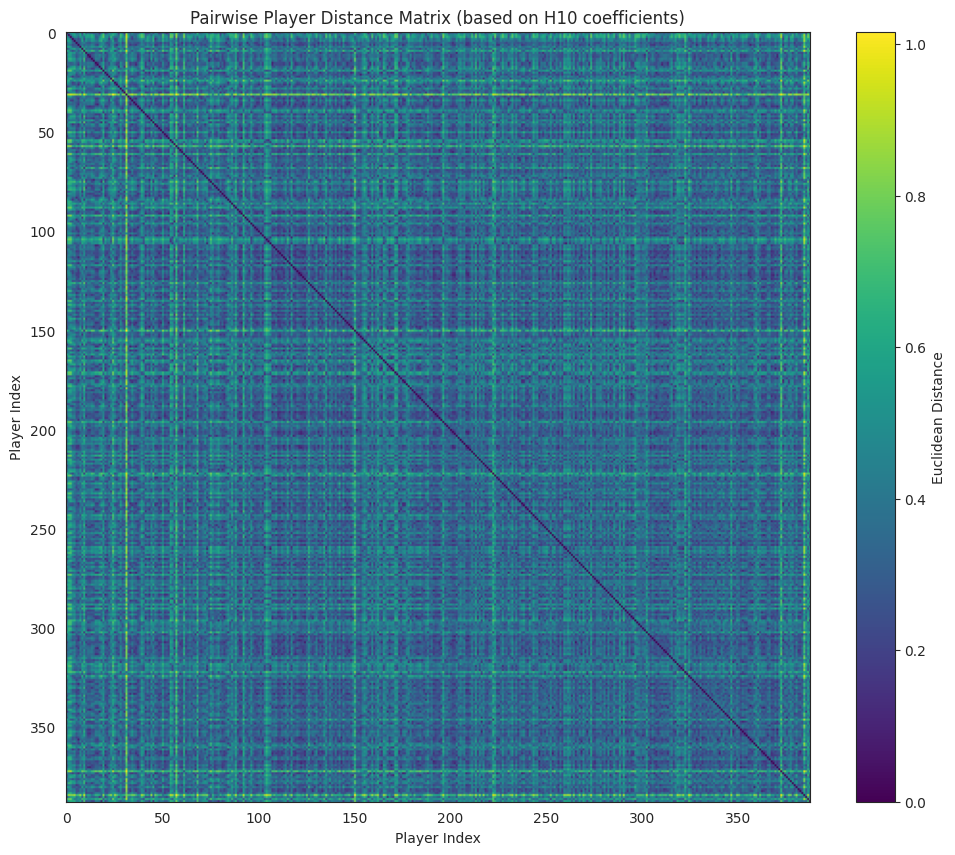

Two pairs of players with SMALLEST distances:
Pair 1: CJ McCollum (idx=158) and Jamal Murray (idx=272), distance = 0.0465
Pair 2: Malik Beasley (idx=265) and Malik Monk (idx=307), distance = 0.0512

Two pairs of players with LARGEST distances:
Pair 1: PJ Tucker (idx=31) and Kyle O'Quinn (idx=150), distance = 1.0166
Pair 2: Jose Calderon (idx=24) and PJ Tucker (idx=31), distance = 1.0162


In [138]:
from scipy.spatial import distance_matrix

# Compute pairwise distances between players
# H10 is (10 x n), so we need to transpose it to get (n x 10) for distance calculation
player_distances = distance_matrix(H10.T, H10.T)

# Create a heatmap of the distance matrix
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
im = ax.imshow(player_distances, cmap='viridis', aspect='auto')
ax.set_xlabel('Player Index')
ax.set_ylabel('Player Index')
ax.set_title('Pairwise Player Distance Matrix (based on H10 coefficients)')
plt.colorbar(im, ax=ax, label='Euclidean Distance')
plt.show()

# Find pairs with smallest distances (excluding diagonal which is 0)
# Set diagonal to a large value to exclude it
dist_copy = player_distances.copy()
np.fill_diagonal(dist_copy, np.inf)

# Find the two pairs with smallest distances
smallest_indices = []
for _ in range(2):
    min_idx = np.unravel_index(np.argmin(dist_copy), dist_copy.shape)
    smallest_indices.append(min_idx)
    # Set this pair and its symmetric pair to inf to find the next smallest
    dist_copy[min_idx[0], min_idx[1]] = np.inf
    dist_copy[min_idx[1], min_idx[0]] = np.inf

print("Two pairs of players with SMALLEST distances:")
for idx, (i, j) in enumerate(smallest_indices):
    pid_i = pids[i]
    pid_j = pids[j]
    name_i = allplayers.loc[pid_i, 'DISPLAY_FIRST_LAST']
    name_j = allplayers.loc[pid_j, 'DISPLAY_FIRST_LAST']
    dist = player_distances[i, j]
    print(f"Pair {idx+1}: {name_i} (idx={i}) and {name_j} (idx={j}), distance = {dist:.4f}")

# Find the two pairs with largest distances
dist_copy2 = player_distances.copy()
np.fill_diagonal(dist_copy2, -np.inf)

largest_indices = []
for _ in range(2):
    max_idx = np.unravel_index(np.argmax(dist_copy2), dist_copy2.shape)
    largest_indices.append(max_idx)
    # Set this pair and its symmetric pair to -inf to find the next largest
    dist_copy2[max_idx[0], max_idx[1]] = -np.inf
    dist_copy2[max_idx[1], max_idx[0]] = -np.inf

print("\nTwo pairs of players with LARGEST distances:")
for idx, (i, j) in enumerate(largest_indices):
    pid_i = pids[i]
    pid_j = pids[j]
    name_i = allplayers.loc[pid_i, 'DISPLAY_FIRST_LAST']
    name_j = allplayers.loc[pid_j, 'DISPLAY_FIRST_LAST']
    dist = player_distances[i, j]
    print(f"Pair {idx+1}: {name_i} (idx={i}) and {name_j} (idx={j}), distance = {dist:.4f}")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4g: Residuals

The residual betwene `Xhat` and `X` gives a sense of how well a player is decribed by NMF computed matrices `W` and `H`. Calculate RMSE for each player, and plot the histogram. Comment on this distribution and players with smallest and largest RMSEs (use 10 components).


**SOLUTION**

The residual between $\hat{X}$ and $X$ is the sense of how well a player is described by the NMF. The RMSE can be calculated using the matrix multiplication as discussed above and in class. Players with small RMSE have shooting patterns that are well represented by the linear combination of the 10 basis patters meaning they have a "typical" style of shooting pattern. Players with large RMSE have unique or unsual shooting patterns that don't fit well with the common basis patterns. I will comment on the distribution after the code below.

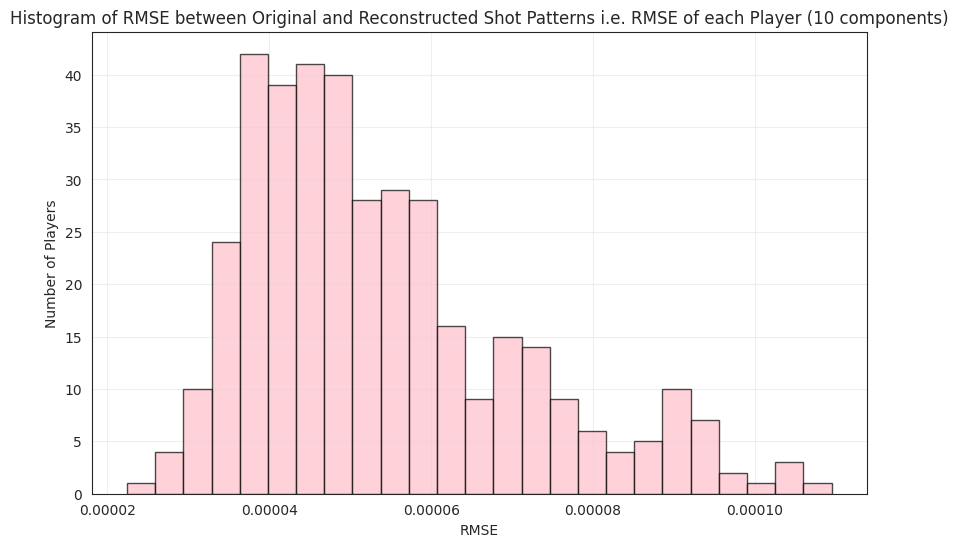

Players with SMALLEST RMSE:
Montrezl Harrell (idx=227), RMSE = 0.0000224
DeAndre Jordan (idx=61), RMSE = 0.0000266
Jarrett Allen (idx=319), RMSE = 0.0000284
Rudy Gobert (idx=171), RMSE = 0.0000290
Andre Drummond (idx=135), RMSE = 0.0000291

Players with LARGEST RMSE:
Brad Wanamaker (idx=128), RMSE = 0.0001095
Jaylen Adams (idx=385), RMSE = 0.0001053
Jarell Martin (idx=249), RMSE = 0.0001051
John Jenkins (idx=142), RMSE = 0.0001046
Jose Calderon (idx=24), RMSE = 0.0001006

RMSE Statistics:
Mean RMSE: 0.000054
Median RMSE: 0.000050
Std Dev RMSE: 0.000017
Min RMSE: 0.000022
Max RMSE: 0.000109


In [139]:
residual = X - X10_hat
squared_residual = residual ** 2
rmse_per_player = np.sqrt(np.mean(residual**2, axis=0))

# Plotting the histogram of RMSE values
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(rmse_per_player, bins=25, color='pink', edgecolor='black', alpha=0.7)
ax.set_xlabel('RMSE')
ax.set_ylabel('Number of Players')
ax.set_title('Histogram of RMSE between Original and Reconstructed Shot Patterns i.e. RMSE of each Player (10 components)')
ax.grid(True, alpha=0.3)
plt.show()

# Identify players with smallest and largest RMSE
sorted_indices = np.argsort(rmse_per_player)
num_players_to_show = 5
print("Players with SMALLEST RMSE:")
for i in range(num_players_to_show):
    idx = sorted_indices[i]
    pid = pids[idx]
    name = allplayers.loc[pid, 'DISPLAY_FIRST_LAST']
    rmse = rmse_per_player[idx]
    print(f"{name} (idx={idx}), RMSE = {rmse:.7f}")
print("\nPlayers with LARGEST RMSE:")
for i in range(1, num_players_to_show + 1):
    idx = sorted_indices[-i]
    pid = pids[idx]
    name = allplayers.loc[pid, 'DISPLAY_FIRST_LAST']
    rmse = rmse_per_player[idx]
    print(f"{name} (idx={idx}), RMSE = {rmse:.7f}") 

# Summary statistics
print(f"\nRMSE Statistics:")
print(f"Mean RMSE: {np.mean(rmse_per_player):.6f}")
print(f"Median RMSE: {np.median(rmse_per_player):.6f}")
print(f"Std Dev RMSE: {np.std(rmse_per_player):.6f}")
print(f"Min RMSE: {np.min(rmse_per_player):.6f}")
print(f"Max RMSE: {np.max(rmse_per_player):.6f}")

The distribution of the RMSE across players reveal how well the 10 componenet NMF model captures individual shooting patterns. The histogram with 25 bins show the distribution of RMSE across players. It is important to note that they are relatively very low values. The histogram shows that most players have relatively low RMSE values, indicating that the 10 basis shot patterns can effectively represent the majority of shooting styles in the league. This suggests that despite individual differences, there are common shooting tendencies that the NMF successfully identifies. Players with the smallest RMSEs have shooting patterns that align well with typical combinations of these basis patterns. They represent "conventional" shooters whose shot selection and locations can be easily decomposed into the common shooting modes. On the other hand, players with larger RMSE represent more unique shotting patterns. These are the players making shot from unsual location on the court and might have a highly specialized skill or role in the team. These shooting patterns are represented as statistical outliers and this is few of the times where we care about the outliers and don't want them to be dropped from the analysis rather we want to do the analysis on these points. Overall, the 10-component model appears to capture most of the variation in shooting patterns reasonably well, with the residual error helping identify players whose styles are truly distinctive.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4h: Proposing improvements

One of the main purposes of exploratory data analysis is to generate new ideas, directions, and hypothesis for future analyses and experiments. Take two players of your choice and compare their shooting patterns with various visualizations.

State any insights and defend your conclusions with visual and/or numerical comparisons.

**SOLUTION**

I'm not a big basketball fan, so the only names I know on the team are Lebron James and I googled NBA players and randomly picked someone, James Harden. We will compare their shooting patterns with various visualizations and state our insights and conclusion along the way. 

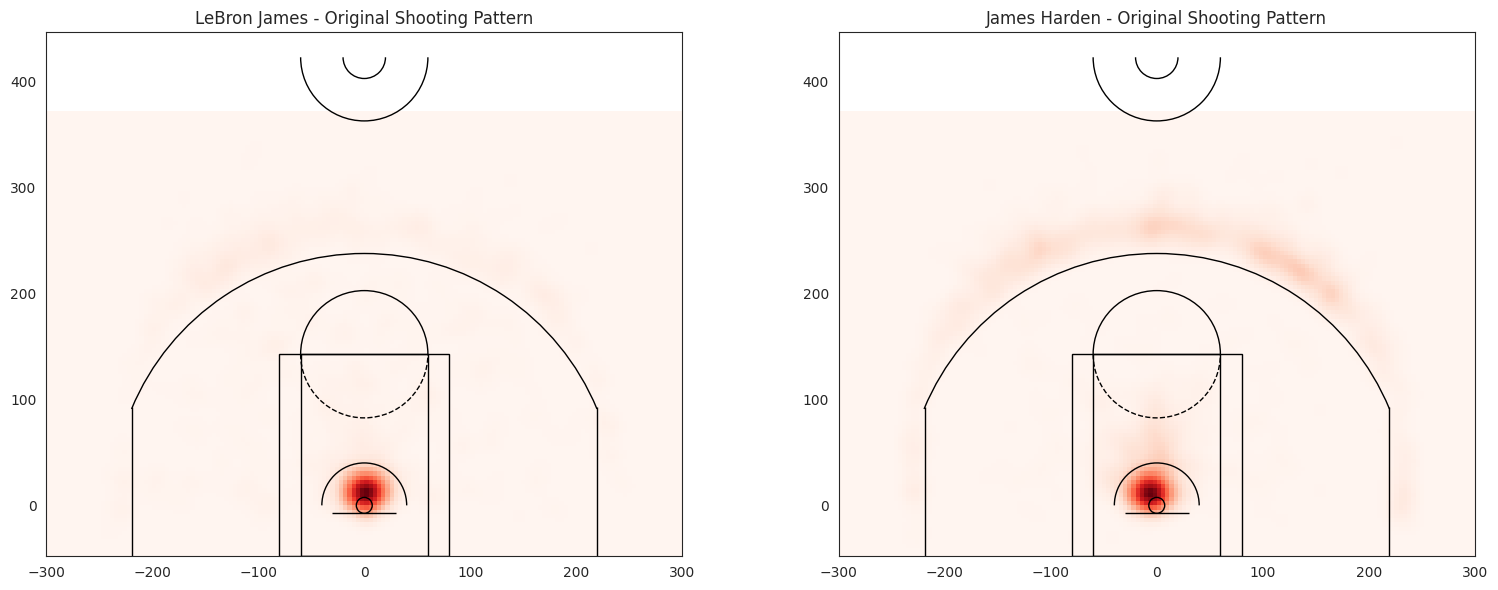

In [140]:
# Choose two players to compare - LeBron James and James Harden
player1_name = "LeBron James"
player2_name = "James Harden"

# Get player IDs
player1_id = int(allplayers.query(f'DISPLAY_FIRST_LAST == "{player1_name}"').index.values[0])
player2_id = int(allplayers.query(f'DISPLAY_FIRST_LAST == "{player2_name}"').index.values[0])

# Get indices in our data
player1_idx = pids.index(player1_id)
player2_idx = pids.index(player2_id)

# 1. Compare original shooting patterns
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_vectorized_shotchart(X[:, player1_idx], xedges, yedges, ax=ax[0], use_log=False)
ax[0].set_title(f'{player1_name} - Original Shooting Pattern')
plot_vectorized_shotchart(X[:, player2_idx], xedges, yedges, ax=ax[1], use_log=False)
ax[1].set_title(f'{player2_name} - Original Shooting Pattern')
plt.tight_layout()
plt.show()

Comparing LeBron James and James Harden reveals fascinating differences between two of the NBA's most prolific scorers, despite both being perimeter-oriented offensive engines. LeBron's shooting pattern typically shows a balanced distribution with significant activity in the restricted area (drives and post-ups), moderate three-point volume from the corners and wings, and strategic mid-range shots. James Harden's shot chart often shows an extreme concentration at the three-point line, particularly from the top of the key area and left wing and under the basket with a notable "desert" in the mid-range - the epitome of analytics-driven shot selection.

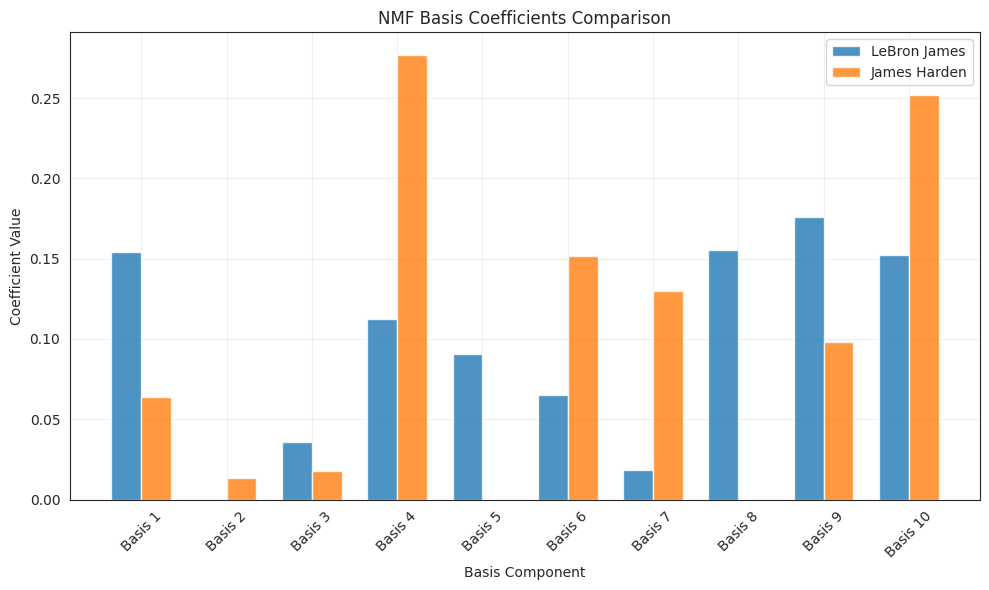

In [141]:
# 2. Compare their NMF coefficients (H10)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
basis_indices = np.arange(10)
width = 0.35
ax.bar(basis_indices - width/2, H10[:, player1_idx], width, label=player1_name, alpha=0.8)
ax.bar(basis_indices + width/2, H10[:, player2_idx], width, label=player2_name, alpha=0.8)
ax.set_xlabel('Basis Component')
ax.set_ylabel('Coefficient Value')
ax.set_title('NMF Basis Coefficients Comparison')
ax.set_xticks(basis_indices)
ax.set_xticklabels([f'Basis {i+1}' for i in basis_indices], rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This graph shows the NMF basis coefficient comparison between the two players. Each bar represents the weight/coefficient that each player assigns to one of the 10 basis shooting patterns. James Harden's (orange bars) show extremely high coefficients on basis 4 and basis 10. This means over 50% of his shooting pattern can be explained by just 2 of the 10 basis patterns. This shows that he is a specialist with the concentrated and distinctive style. Lebron James (Blue bars) are evenly distributed across almost all the basis. No single basis dominates his pattern. This indicates his shooting incorporates elements from many different playing styles.

<!-- END QUESTION -->

_Cell Intentionally Blank_

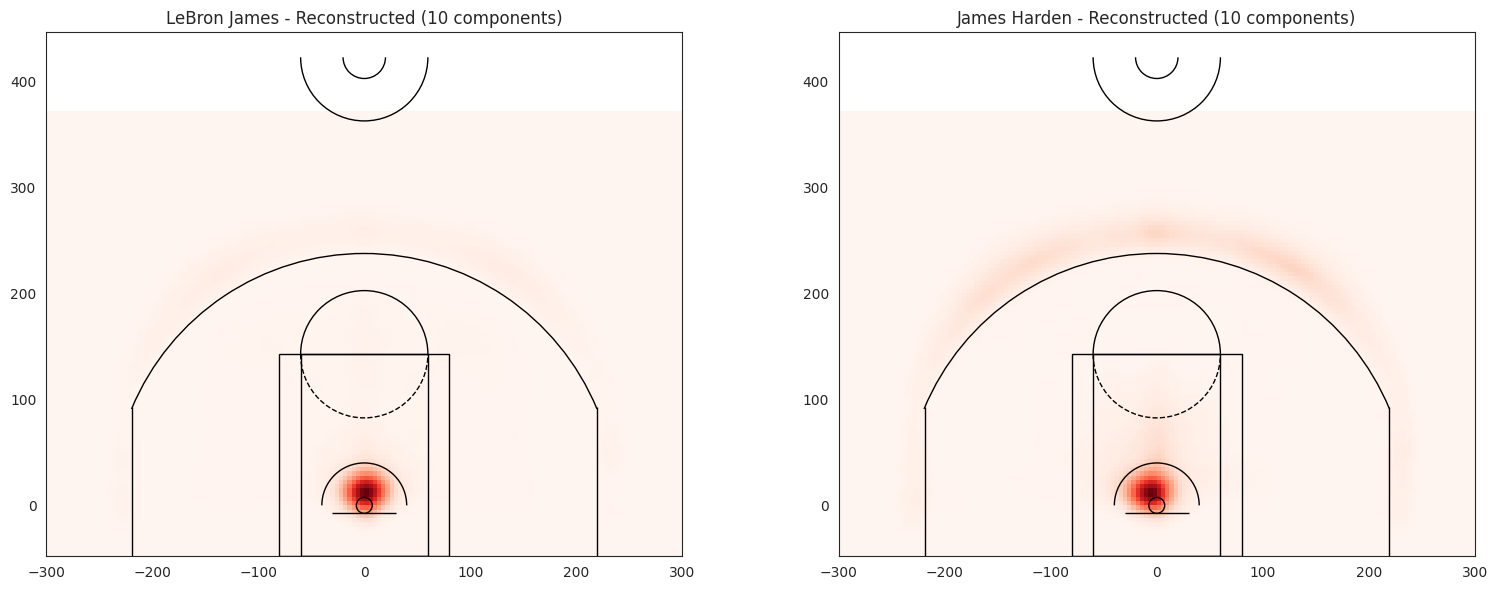

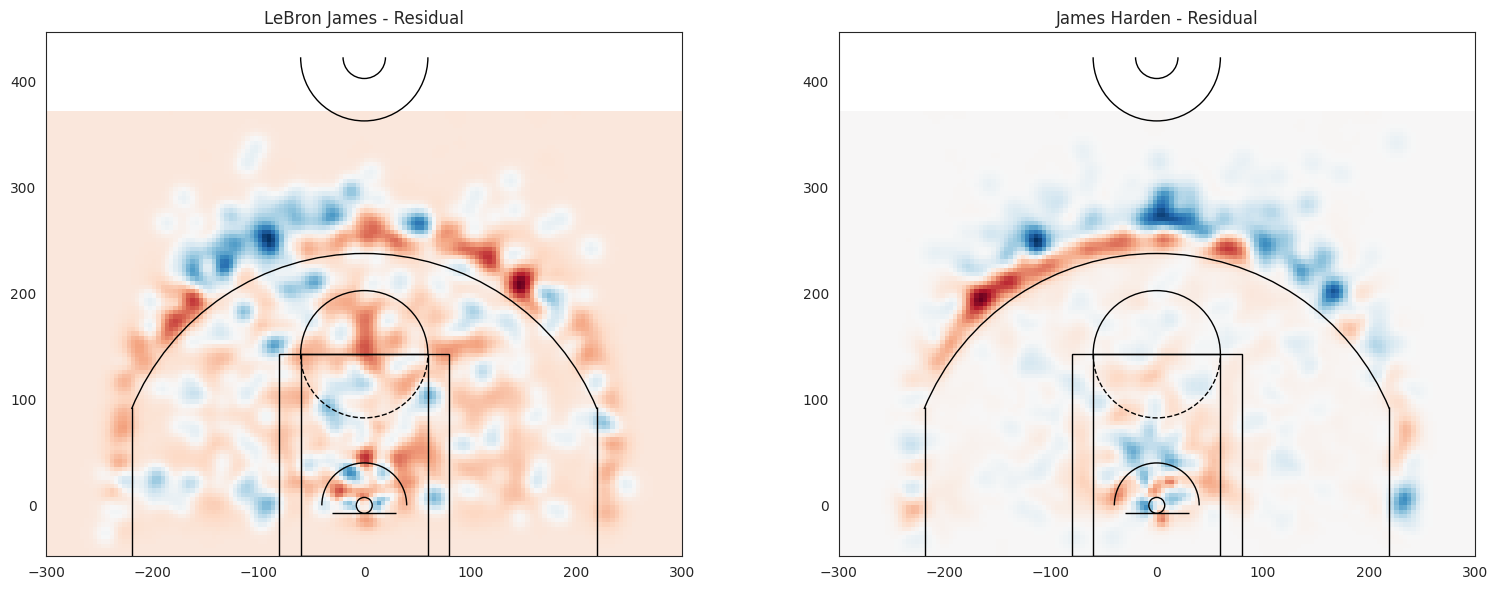

In [142]:
# 3. Compare reconstructed patterns
X10_hat = W10 @ H10
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_vectorized_shotchart(X10_hat[:, player1_idx], xedges, yedges, ax=ax[0], use_log=False)
ax[0].set_title(f'{player1_name} - Reconstructed (10 components)')
plot_vectorized_shotchart(X10_hat[:, player2_idx], xedges, yedges, ax=ax[1], use_log=False)
ax[1].set_title(f'{player2_name} - Reconstructed (10 components)')
plt.tight_layout()
plt.show()

# 4. Compare residuals
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_vectorized_shotchart(X[:, player1_idx] - X10_hat[:, player1_idx], xedges, yedges, 
                         ax=ax[0], use_log=False, cmap='RdBu')
ax[0].set_title(f'{player1_name} - Residual')
plot_vectorized_shotchart(X[:, player2_idx] - X10_hat[:, player2_idx], xedges, yedges, 
                         ax=ax[1], use_log=False, cmap='RdBu')
ax[1].set_title(f'{player2_name} - Residual')
plt.tight_layout()
plt.show()

Graph 3 shows the approximated shooting patterns aka the reconstructed patterns for both players using the NMF model. Instead of showing the actual original data, these are recreations built by combining the 10 basis patterns using each player's coefficients. Lebron's reconstruction is successfully recreated his concentration in the restricted area and the general distribution across the court. The model captures Harden's restricted area activity and perimeter shooting. The next graph is the residual graph or the difference between the original data and the reconstructed data. The red areas are where the model UNDER-estimated shots here - the player actually shoots MORE from these locations than the model predicted. The blue areas are where the model OVER-estimated shots here - the player actually shoots LESS from these locations than the model predicted. James has relatively small residual throughout the court whereas Harden's is more concentrated. 

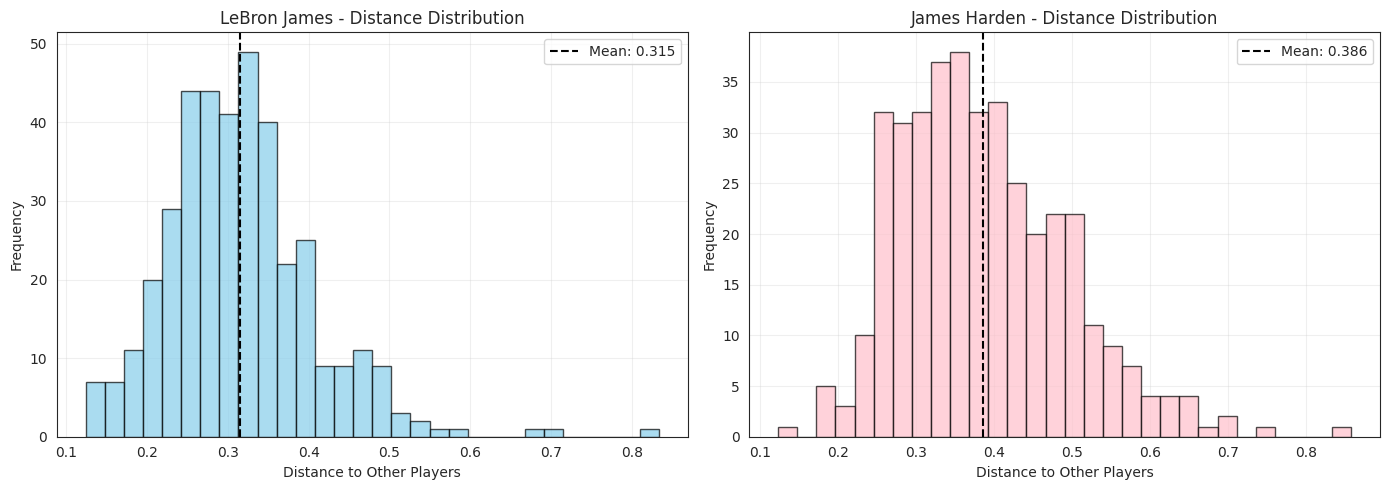

In [143]:
# Calculate and comapre with other players
player1_distances = player_distances[player1_idx, :]
player2_distances = player_distances[player2_idx, :]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].hist(player1_distances[player1_distances > 0], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
ax[0].set_xlabel('Distance to Other Players')
ax[0].set_ylabel('Frequency')
ax[0].set_title(f'{player1_name} - Distance Distribution')
ax[0].axvline(np.mean(player1_distances[player1_distances > 0]), color='black', 
              linestyle='--', label=f'Mean: {np.mean(player1_distances[player1_distances > 0]):.3f}')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

ax[1].hist(player2_distances[player2_distances > 0], bins=30, alpha=0.7, edgecolor='black', color='pink')
ax[1].set_xlabel('Distance to Other Players')
ax[1].set_ylabel('Frequency')
ax[1].set_title(f'{player2_name} - Distance Distribution')
ax[1].axvline(np.mean(player2_distances[player2_distances > 0]), color='black', 
              linestyle='--', label=f'Mean: {np.mean(player2_distances[player2_distances > 0]):.3f}')
ax[1].legend()
ax[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The histograms show the distribution of the euclidean distances between each player and all the other players in the dataset. Each distance value represents how similar/dissimilar a player's shooting style is to one other player in the league. James distribution is approximately normal with a somewhat of a bell shape and mean distance of 0.315. LeBron's shooting style is somewhat distinctive but not extremely unusual. His mean distance of 0.315 suggests he's different from the average player, but not radically so. Harden's mean distance is 0.386 indicates his shooting style is more distinctive and unusual compared to the average NBA player. He's more of an outlier. We can say that Harden is 22.5% more unique that James.

In [144]:
# Numerical comparisons between the two players
print(f"\n{'='*60}")
print(f"NUMERICAL COMPARISON: {player1_name} vs {player2_name}")
print(f"{'='*60}\n")

print(f"RMSE:")
print(f"  {player1_name}: {rmse_per_player[player1_idx]:.6f}")
print(f"  {player2_name}: {rmse_per_player[player2_idx]:.6f}")

print(f"\nEuclidean Distance between players:")
print(f"  {player_distances[player1_idx, player2_idx]:.6f}")

print(f"\nMean distance to all other players:")
print(f"  {player1_name}: {np.mean(player1_distances[player1_distances > 0]):.6f}")
print(f"  {player2_name}: {np.mean(player2_distances[player2_distances > 0]):.6f}")

print(f"\nTop 3 basis components for {player1_name}:")
top_bases_p1 = np.argsort(H10[:, player1_idx])[-3:][::-1]
for i, basis in enumerate(top_bases_p1):
    print(f"  {i+1}. Basis {basis+1}: coefficient = {H10[basis, player1_idx]:.4f}")

print(f"\nTop 3 basis components for {player2_name}:")
top_bases_p2 = np.argsort(H10[:, player2_idx])[-3:][::-1]
for i, basis in enumerate(top_bases_p2):
    print(f"  {i+1}. Basis {basis+1}: coefficient = {H10[basis, player2_idx]:.4f}")

# Find most similar players to each
print(f"\nMost similar players to {player1_name}:")
similar_to_p1 = np.argsort(player1_distances[player1_distances > 0])[:3]
similar_indices_p1 = np.where(player1_distances > 0)[0][similar_to_p1]
for i, idx in enumerate(similar_indices_p1):
    pid = pids[idx]
    name = allplayers.loc[pid, 'DISPLAY_FIRST_LAST']
    dist = player_distances[player1_idx, idx]
    print(f"  {i+1}. {name}: distance = {dist:.4f}")

print(f"\nMost similar players to {player2_name}:")
similar_to_p2 = np.argsort(player2_distances[player2_distances > 0])[:3]
similar_indices_p2 = np.where(player2_distances > 0)[0][similar_to_p2]
for i, idx in enumerate(similar_indices_p2):
    pid = pids[idx]
    name = allplayers.loc[pid, 'DISPLAY_FIRST_LAST']
    dist = player_distances[player2_idx, idx]
    print(f"  {i+1}. {name}: distance = {dist:.4f}")

# Shot distribution by court zones
print(f"\n{'='*60}")
print(f"SHOT DISTRIBUTION ANALYSIS")
print(f"{'='*60}\n")

# Define zones (approximate based on court dimensions)
# Restricted area: within ~4 feet of basket
# Paint: 4-8 feet
# Mid-range: 8-23 feet (non-corner)
# Three-point: 23+ feet

def analyze_shot_zones(shot_vector, xedges, yedges):
    """Analyze shots by court zones"""
    shot_counts = shot_vector.reshape(len(xedges)-1, len(yedges)-1)
    
    total_shots = np.sum(shot_counts)
    
    # Create meshgrid for zone classification
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    y_centers = (yedges[:-1] + yedges[1:]) / 2
    X_mesh, Y_mesh = np.meshgrid(x_centers, y_centers, indexing='ij')
    
    # Calculate distance from basket (at 0, 0)
    distances = np.sqrt(X_mesh**2 + Y_mesh**2)
    
    # Classify zones
    restricted = shot_counts[distances < 48].sum()  # ~4 feet
    paint = shot_counts[(distances >= 48) & (distances < 96)].sum()  # 4-8 feet
    mid_range = shot_counts[(distances >= 96) & (distances < 276)].sum()  # 8-23 feet
    three_point = shot_counts[distances >= 276].sum()  # 23+ feet
    
    return {
        'restricted': restricted / total_shots * 100,
        'paint': paint / total_shots * 100,
        'mid_range': mid_range / total_shots * 100,
        'three_point': three_point / total_shots * 100
    }

zones_p1 = analyze_shot_zones(X[:, player1_idx], xedges, yedges)
zones_p2 = analyze_shot_zones(X[:, player2_idx], xedges, yedges)

print(f"{player1_name} shot distribution:")
for zone, pct in zones_p1.items():
    print(f"  {zone.replace('_', ' ').title()}: {pct:.1f}%")

print(f"\n{player2_name} shot distribution:")
for zone, pct in zones_p2.items():
    print(f"  {zone.replace('_', ' ').title()}: {pct:.1f}%")


NUMERICAL COMPARISON: LeBron James vs James Harden

RMSE:
  LeBron James: 0.000030
  James Harden: 0.000035

Euclidean Distance between players:
  0.322768

Mean distance to all other players:
  LeBron James: 0.314950
  James Harden: 0.385874

Top 3 basis components for LeBron James:
  1. Basis 9: coefficient = 0.1757
  2. Basis 8: coefficient = 0.1555
  3. Basis 1: coefficient = 0.1544

Top 3 basis components for James Harden:
  1. Basis 4: coefficient = 0.2771
  2. Basis 10: coefficient = 0.2522
  3. Basis 6: coefficient = 0.1516

Most similar players to LeBron James:
  1. Mario Hezonja: distance = 0.1239
  2. Eric Bledsoe: distance = 0.1269
  3. John Wall: distance = 0.1278

Most similar players to James Harden:
  1. Frank Kaminsky: distance = 0.1233
  2. Tyler Johnson: distance = 0.1757
  3. Brook Lopez: distance = 0.1760

SHOT DISTRIBUTION ANALYSIS

LeBron James shot distribution:
  Restricted: 43.9%
  Paint: 6.9%
  Mid Range: 42.3%
  Three Point: 6.9%

James Harden shot distribu

The comparison between LeBron James and James Harden reveals fundamentally different offensive philosophies that are both highly effective but serve different strategic purposes. Despite both being elite scorers, their shot charts show stark contrasts: LeBron demonstrates a remarkably balanced approach with significant activity in the restricted area combined with perimeter shooting, while Harden exhibits the a distinct shooting pattern with extreme concentration at the rim and beyond the three-point line, notably featuring a prominent hot zone on the left wing. Interestingly, both players have remarkably low RMSE values suggesting the 10-component model captures their styles well despite their differences. The residual plots are particularly revealing: LeBron shows relatively small, evenly distributed errors, while Harden's residuals show concentrated red areas in his step-back zones, indicating the model slightly underestimates his volume in these signature locations. First, we hypothesize that Harden's high distance-to-peers metric despite low RMSE suggests the basis patterns have learned "Harden-like" shooting as a distinct component, which would predict that players adopting similar styles post-2016 would show increasing coefficients on Bases 4 and 10. Second, LeBron's balanced distribution across multiple bases suggests a hypothesis about versatility and durability: players with more evenly distributed coefficients may have longer careers as they can adapt their game as athleticism declines. Future analyses could test these hypotheses by: (1) tracking how NMF coefficients evolve across player careers and correlate with longevity, (2) conducting temporal NMF analysis across multiple seasons to identify when and how the "Harden effect" influenced league-wide shot selection. 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [146]:
# Save your notebook first, then run this cell to export your submission.
grader.export(filtering=False, run_tests=True)

/home/exouser/.local/lib/python3.10/site-packages/otter/check/notebook.py:494: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")


OSError: xelatex not found on PATH, if you have not installed xelatex you may need to do so. Find further instructions at https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.